In [1]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
%matplotlib inline

import numpy as np

import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import scipy
import seaborn as sns

In [2]:
tournament_id = 89132

In [3]:
df = pd.read_pickle(f"../data/processed/{tournament_id}-processed.pkl")
df.head()

,first_name,last_name,city,state,country,nationality,pdga_num,player_rating,rating_effective_date,player_class,result_id,tournament_division,tournament_place,tied_finish,formatted_place,shot_total,tournament_total_to_par,prize_usd,tournament_dnf,tournament_average_rating,tournament_rating_delta,score_id,round,tee_time,course_name,layout_name,par,round_score,score_to_par,round_dnf,num_birdies,num_bogeys,round_rating,num_holes,layout_length,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18
0,Harry,Chace,East Greenwich,RI,US,US,131546,1023,2025-08-12,Professional,211586222,MPO,1,False,1st,120,-11,660,False,1031,8,25450418,1,14:36:00,Nockamixon State Park,LVO 2025,68,61,-7,False,8,1,1032,18,9325,4,4,3,4,2,3,3,4,4,3,3,2,5,5,2,3,3,4
1,Harry,Chace,East Greenwich,RI,US,US,131546,1023,2025-08-12,Professional,211586222,MPO,1,False,1st,120,-11,660,False,1031,8,25483066,2,14:36:00,The Preserve Disc Golf Course,LVO 2025,63,59,-4,False,7,3,1030,18,9073,3,3,3,2,3,4,4,4,4,4,3,2,3,4,3,3,2,5
2,Dylan,Horst,West Chester,PA,US,None,32599,1008,2025-08-12,Professional,211586679,MPO,5,True,T-5th,124,-7,230,False,1017,9,25449101,1,14:00:00,Nockamixon State Park,LVO 2025,68,62,-6,False,7,1,1025,18,9325,4,4,2,3,3,3,3,4,4,4,3,2,5,4,3,3,4,4
3,Dylan,Horst,West Chester,PA,US,None,32599,1008,2025-08-12,Professional,211586679,MPO,5,True,T-5th,124,-7,230,False,1017,9,25483067,2,14:36:00,The Preserve Disc Golf Course,LVO 2025,63,62,-1,False,4,3,1008,18,9073,3,4,2,2,3,4,4,4,3,4,3,3,5,4,4,3,3,4
4,Mike,Carman,Ottsville,PA,US,None,48559,992,2025-08-12,Professional,211653303,MPO,2,True,T-2nd,122,-9,420,False,1024,32,25449681,1,14:24:00,Nockamixon State Park,LVO 2025,68,62,-6,False,7,1,1025,18,9325,5,4,2,4,3,3,4,3,4,4,3,2,4,4,2,3,4,4


## Nockamixon analysis only
Exclude data from the AGA rounds

In [4]:
df = df.query("course_name == 'Nockamixon State Park'").copy()

# Drop dnf rounds
df = df[~df.round_dnf].copy()

df = df.reset_index(drop=True).copy()
#df.head()

## Exclude columns not germane to this analysis

In [5]:
df.columns

Index(['first_name', 'last_name', 'city', 'state', 'country', 'nationality',
       'pdga_num', 'player_rating', 'rating_effective_date', 'player_class',
       'result_id', 'tournament_division', 'tournament_place', 'tied_finish',
       'formatted_place', 'shot_total', 'tournament_total_to_par', 'prize_usd',
       'tournament_dnf', 'tournament_average_rating',
       'tournament_rating_delta', 'score_id', 'round', 'tee_time',
       'course_name', 'layout_name', 'par', 'round_score', 'score_to_par',
       'round_dnf', 'num_birdies', 'num_bogeys', 'round_rating', 'num_holes',
       'layout_length', 'Hole 1', 'Hole 2', 'Hole 3', 'Hole 4', 'Hole 5',
       'Hole 6', 'Hole 7', 'Hole 8', 'Hole 9', 'Hole 10', 'Hole 11', 'Hole 12',
       'Hole 13', 'Hole 14', 'Hole 15', 'Hole 16', 'Hole 17', 'Hole 18'],
      dtype='object')

In [6]:
df = df[['first_name', 'last_name', 'city', 'state', 'country', 'nationality',
       'pdga_num', 'player_rating', 
         #'rating_effective_date', 
         'player_class',
       #'result_id', 
         'tournament_division', 'tournament_place', 'tied_finish',
       #'formatted_place', 
         #'shot_total', 'tournament_total_to_par', 
         'prize_usd',
       #'tournament_dnf', 'tournament_average_rating',
       #'tournament_rating_delta', 
         'score_id', 'round', 'tee_time',
       #'course_name', 'layout_name', 
         #'par', 
         'round_score', 'score_to_par',
       #'round_dnf', 
         'num_birdies', 'num_bogeys', 'round_rating', #
        #'num_holes','layout_length', 
         'Hole 1', 'Hole 2', 'Hole 3', 'Hole 4', 'Hole 5',
       'Hole 6', 'Hole 7', 'Hole 8', 'Hole 9', 'Hole 10', 'Hole 11', 'Hole 12',
       'Hole 13', 'Hole 14', 'Hole 15', 'Hole 16', 'Hole 17', 'Hole 18']]

df.head()

,first_name,last_name,city,state,country,nationality,pdga_num,player_rating,player_class,tournament_division,tournament_place,tied_finish,prize_usd,score_id,round,tee_time,round_score,score_to_par,num_birdies,num_bogeys,round_rating,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18
0,Harry,Chace,East Greenwich,RI,US,US,131546,1023,Professional,MPO,1,False,660,25450418,1,14:36:00,61,-7,8,1,1032,4,4,3,4,2,3,3,4,4,3,3,2,5,5,2,3,3,4
1,Dylan,Horst,West Chester,PA,US,None,32599,1008,Professional,MPO,5,True,230,25449101,1,14:00:00,62,-6,7,1,1025,4,4,2,3,3,3,3,4,4,4,3,2,5,4,3,3,4,4
2,Mike,Carman,Ottsville,PA,US,None,48559,992,Professional,MPO,2,True,420,25449681,1,14:24:00,62,-6,7,1,1025,5,4,2,4,3,3,4,3,4,4,3,2,4,4,2,3,4,4
3,RJ,Chirkis,Hawthorne,NJ,US,None,193310,972,Amateur,MPO,17,True,0,25436519,1,11:36:00,62,-6,8,2,1025,5,3,2,3,3,3,4,3,4,3,3,4,3,5,3,3,4,4
4,Zackary,Doyle,Warwick,NY,US,None,21441,985,Professional,MPO,7,True,200,25445286,1,13:24:00,64,-4,7,3,1012,5,5,3,3,4,3,3,4,4,3,4,2,3,4,3,3,3,5


In [7]:
df.shape

(178, 39)

## Univariate analysis

### Hole scores

In [8]:
hole_list = []
for i in range(1, 19):
    hole_list.append(f"Hole {i}")

agg_functions = ['mean', 'std', 'min', 'max']

#### Performance of the entire field

In [9]:
df[hole_list].agg(agg_functions).round(2)

,Hole 1,Hole 2,Hole 3,Hole 4,Hole 5,Hole 6,Hole 7,Hole 8,Hole 9,Hole 10,Hole 11,Hole 12,Hole 13,Hole 14,Hole 15,Hole 16,Hole 17,Hole 18
mean,6.06,4.04,2.98,4.25,3.56,3.92,3.54,4.72,4.79,4.39,3.96,3.28,4.62,5.67,3.28,3.15,4.25,4.71
std,0.99,0.90,0.69,0.87,0.75,0.77,0.82,1.02,0.91,0.79,0.90,0.77,1.04,1.13,0.87,0.73,0.70,0.92
min,4.00,2.00,2.00,3.00,2.00,3.00,2.00,3.00,3.00,3.00,2.00,2.00,3.00,4.00,2.00,2.00,3.00,3.00
max,9.00,7.00,5.00,8.00,6.00,7.00,6.00,8.00,9.00,6.00,7.00,6.00,10.00,10.00,7.00,6.00,7.00,8.00


## Barplots of individual holes for the entire field

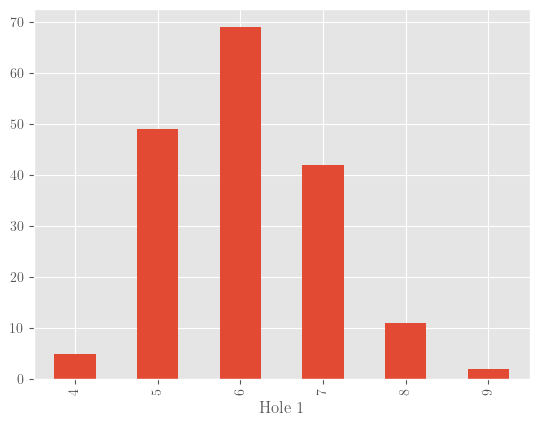

In [10]:
df["Hole 1"].value_counts().sort_index().plot(kind="bar")
plt.show()

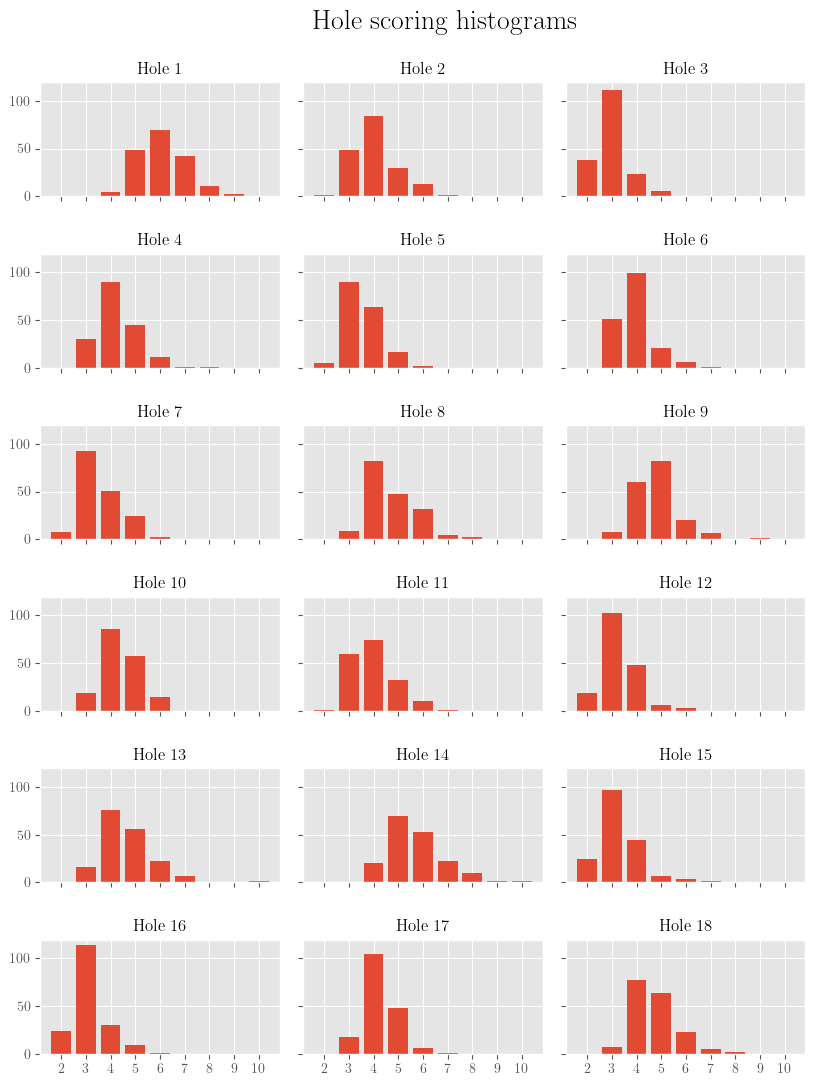

In [11]:
max_score = df.iloc[0:, 21:].max().max()
min_score = df.iloc[0:, 21:].min().min()

vals = range(min_score, max_score + 1)

fig, axs = plt.subplots(6, 3, sharex=True, sharey=True, figsize = (9, 12))
fig.suptitle("Hole scoring histograms", fontsize=20)

for i in range(18):
    
    counts = df[f"Hole {i+1}"].value_counts().to_dict()
    for v in vals:
        if v not in counts.keys():
            counts[v] = 0
    
    ax = axs[i // 3, i%3]
    
    ax.bar(counts.keys(), counts.values())
    #df[f"Hole {i + 1.plot(ax=ax, kind='bar', fontsize=14, title=f"Hole {i+1}")
    ax.set_title(f"Hole {i+1}", fontsize=12)
    ax.set_xticks(vals)
    #ax.set_xlabel("")
    
fig.subplots_adjust(top=0.92, left=0.05, hspace=0.5, wspace=0.1)
plt.show()



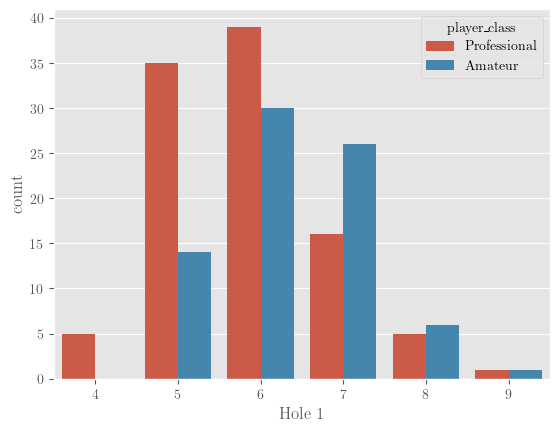

In [19]:
sns.countplot(data=df, x="Hole 1", hue = "player_class")
plt.show()

<Axes: xlabel='Hole 1'>

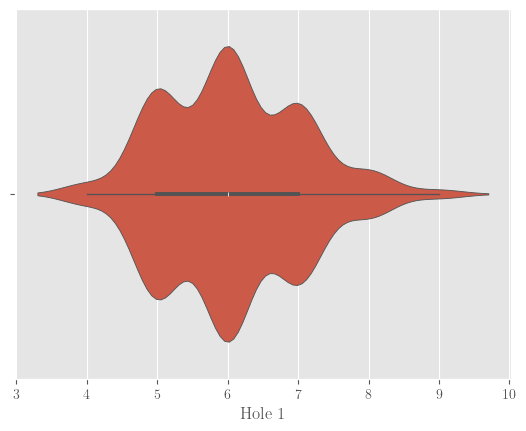

In [20]:
sns.violinplot(data=df, x="Hole 1")

## Feature relationships

In [13]:
df.groupby("tournament_division")[hole_list].agg(agg_functions).round(2)

Hole 1               Hole 2               Hole 3        \
                      mean   std min max   mean   std min max   mean   std   
tournament_division                                                          
FPO                   6.64  1.15   5   9   4.71  0.83   4   6   3.36  0.74   
MA1                   6.19  0.88   5   8   3.86  0.86   2   6   3.00  0.78   
MA2                   6.36  0.76   5   8   4.48  1.00   3   6   3.20  0.82   
MA3                   6.86  0.69   6   8   4.71  0.76   4   6   3.14  0.38   
MA40                  7.67  1.53   6   9   4.33  0.58   4   5   3.00  0.00   
MP40                  5.57  0.68   4   7   3.81  0.68   3   5   2.81  0.60   
MPO                   5.77  0.97   4   8   3.85  0.86   3   7   2.86  0.62   

                            Hole 4               Hole 5               Hole 6  \
                    min max   mean   std min max   mean   std min max   mean   
tournament_division                                                            
FPO                   2   5   4.79  0.89   3   6   3.86  0.77   3   5   4.64   
MA1                   2   5   4.08  0.55   3   5   3.43  0.60   3   5   3.78   
MA2                   2   5   4.56  0.92   3   7   3.84  0.85   2   5   4.08   
MA3                   3   4   5.14  1.46   4   8   4.14  0.90   3   5   4.57   
MA40                  3   3   5.00  1.00   4   6   3.67  0.58   3   4   4.33   
MP40                  2   4   3.90  0.83   3   6   3.33  0.58   3   5   4.00   
MPO                   2   5   4.10  0.80   3   6   3.46  0.77   2   6   3.68   

                                  Hole 7               Hole 8                \
                      std min max   mean   std min max   mean   std min max   
tournament_division                                                           
FPO                  0.84   4   7   3.79  0.70   3   5   5.21  1.12   4   8   
MA1                  0.63   3   5   3.68  0.91   2   6   4.70  0.97   3   8   
MA2                  0.70   3   6   3.60  0.82   2   5   4.72  0.89   4   7   
MA3                  1.13   3   6   4.29  0.95   3   6   5.29  1.80   3   8   
MA40                 0.58   4   5   3.33  0.58   3   4   5.00  1.00   4   6   
MP40                 0.84   3   6   3.48  0.75   3   5   4.81  0.93   4   7   
MPO                  0.65   3   6   3.37  0.78   2   5   4.55  0.98   3   7   

                    Hole 9               Hole 10               Hole 11        \
                      mean   std min max    mean   std min max    mean   std   
tournament_division                                                            
FPO                   5.57  0.94   4   7    5.00  0.68   4   6    4.64  0.74   
MA1                   4.81  1.00   3   9    4.46  0.69   3   6    4.16  0.80   
MA2                   5.16  0.80   4   7    4.68  0.80   3   6    4.12  1.09   
MA3                   5.14  0.69   4   6    5.00  0.82   4   6    4.57  0.79   
MA40                  5.33  1.53   4   7    4.67  0.58   4   5    3.33  0.58   
MP40                  4.76  0.94   3   7    4.29  0.72   3   6    3.81  0.87   
MPO                   4.44  0.73   3   6    4.08  0.75   3   6    3.68  0.82   

                            Hole 12               Hole 13                \
                    min max    mean   std min max    mean   std min max   
tournament_division                                                       
FPO                   4   6    3.43  0.65   3   5    4.86  0.53   4   6   
MA1                   3   6    3.30  0.70   2   5    4.51  0.84   3   7   
MA2                   3   7    3.48  1.00   2   6    5.20  0.82   4   7   
MA3                   4   6    3.86  0.69   3   5    6.14  2.12   4  10   
MA40                  3   4    3.00  0.00   3   3    5.00  1.00   4   6   
MP40                  3   6    3.14  0.57   2   4    4.43  0.68   4   6   
MPO                   2   6    3.17  0.77   2   6    4.32  1.03   3   7   

                    Hole 14               Hole 15               Hole 16        \
              

In [14]:
df.groupby(by="tournament_division")["Hole 1"].agg('mean').sort_values()

tournament_division
MP40    5.571429
MPO     5.774648
MA1     6.189189
MA2     6.360000
FPO     6.642857
MA3     6.857143
MA40    7.666667
Name: Hole 1, dtype: float64

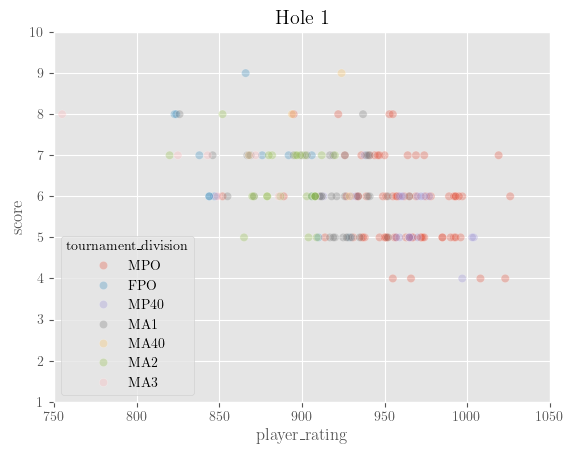

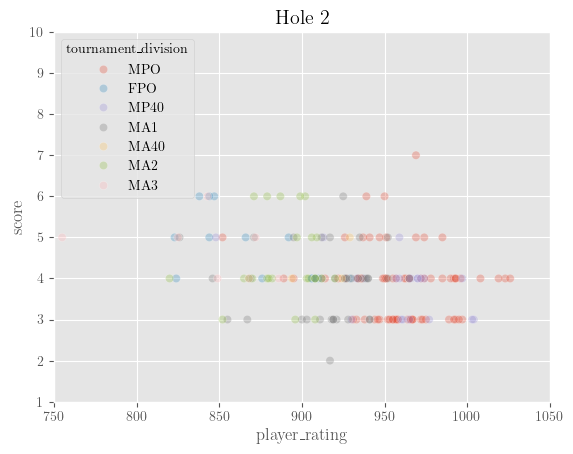

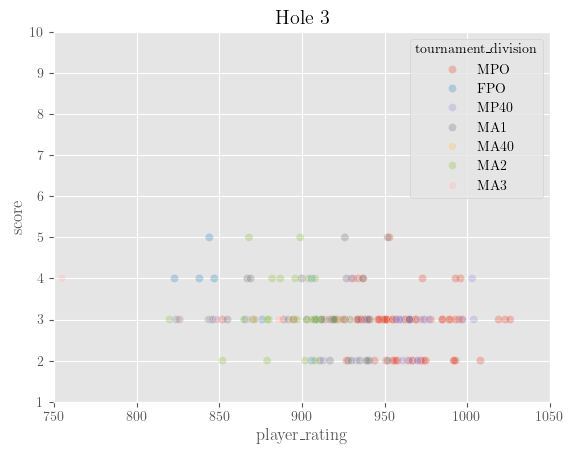

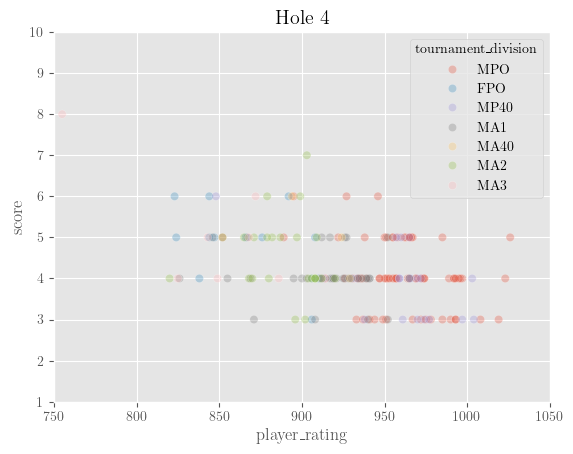

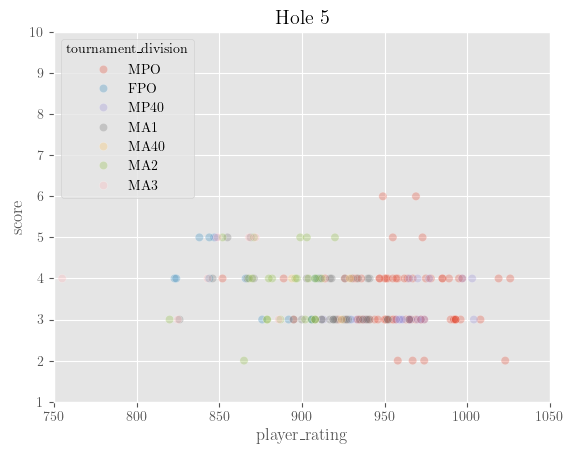

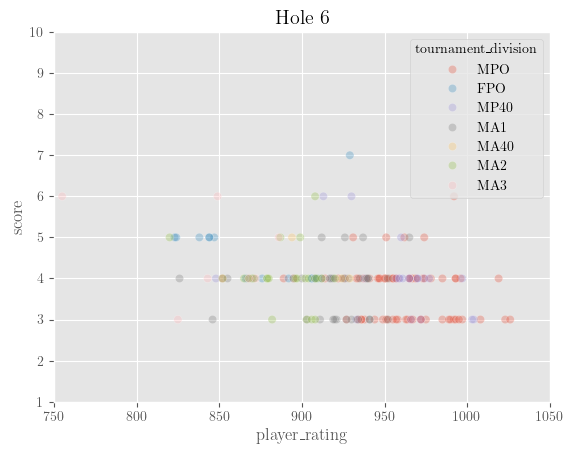

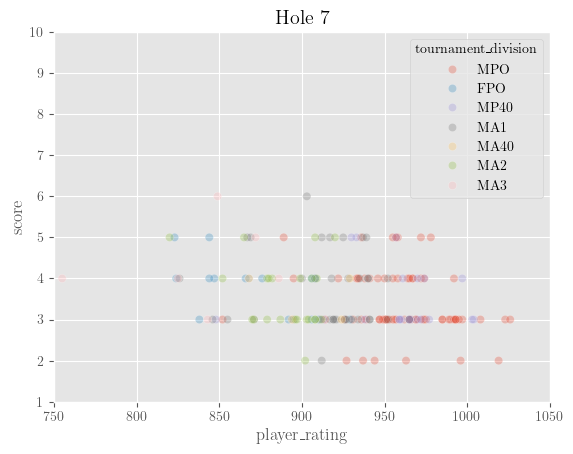

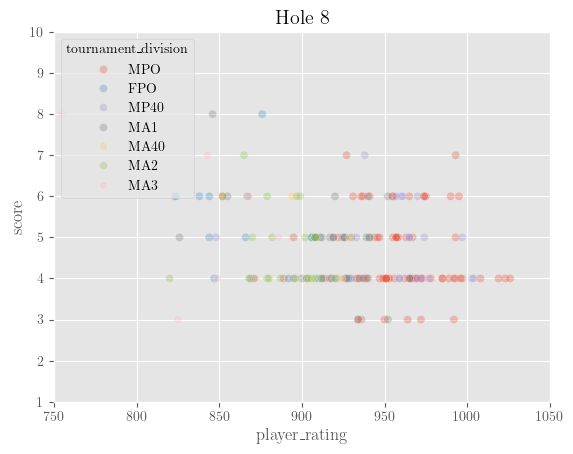

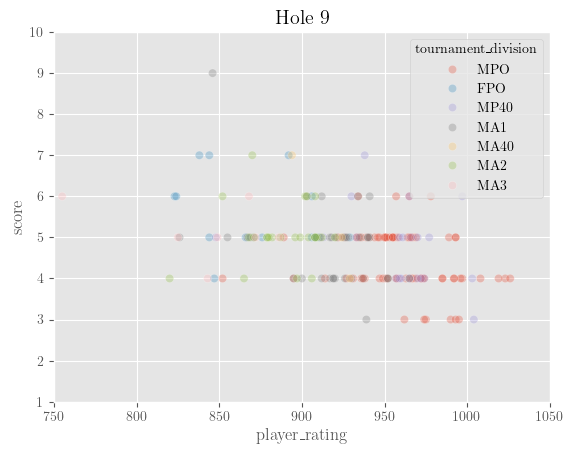

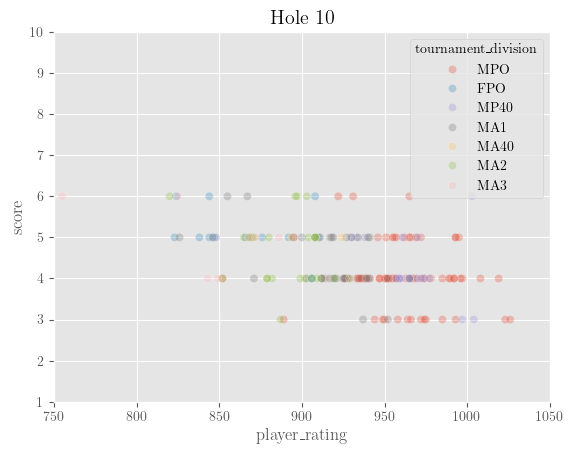

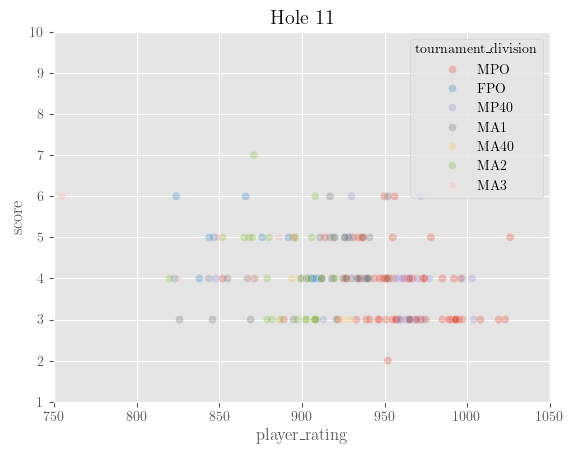

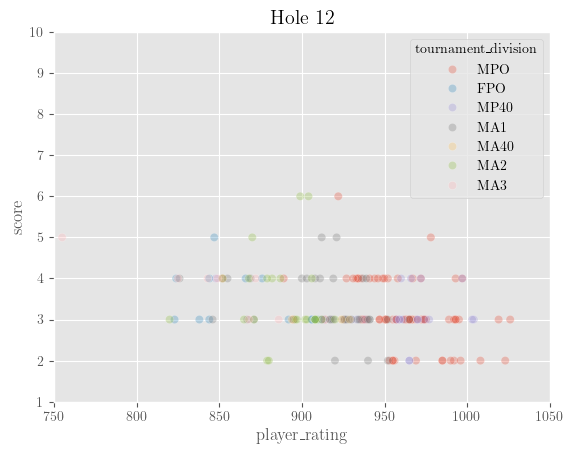

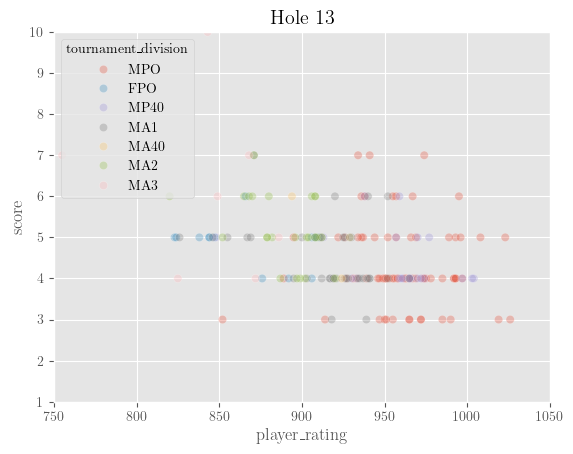

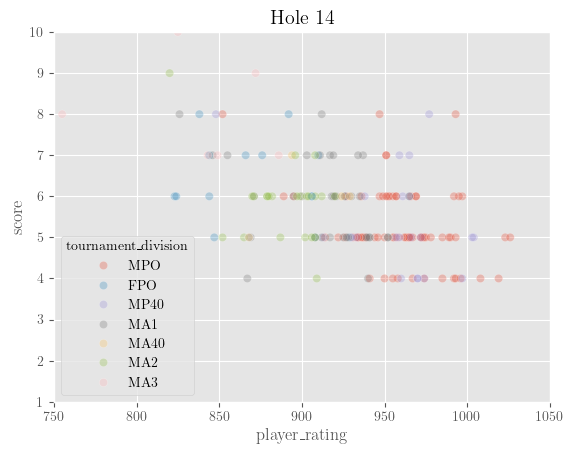

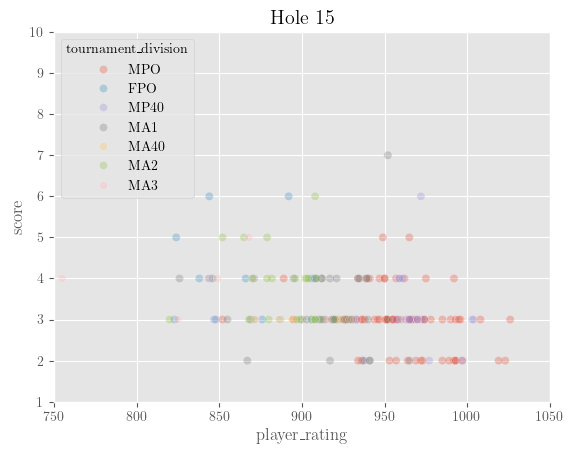

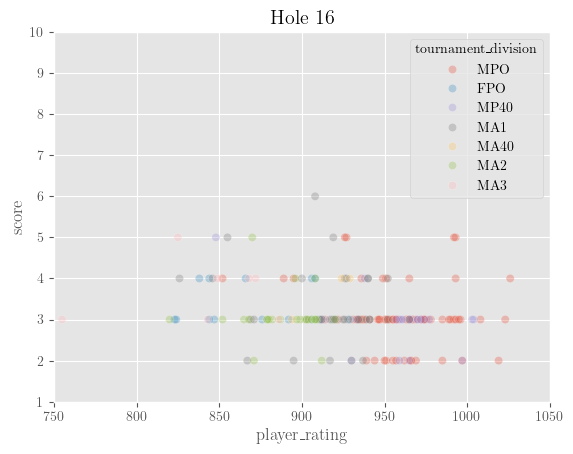

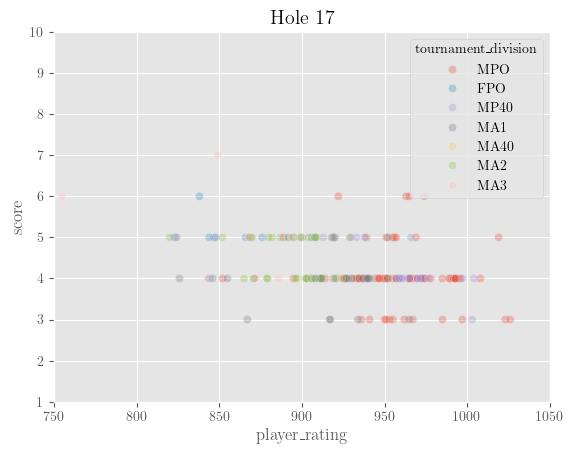

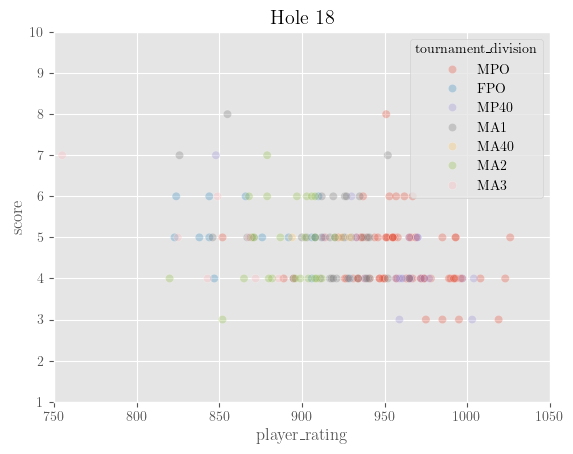

In [15]:
for i in range(1, 19):
    
    ax = sns.scatterplot(data = df, x = "player_rating", y = f"Hole {i}", hue = "tournament_division", alpha = 0.3)
    ax.set_xlim([750, 1050])
    ax.set_ylim([1, 10])
    ax.set_title(f"Hole {i}")
    ax.set_ylabel("score")
    plt.show()

In [16]:
ax = sns.pairplot(df, vars=["Hole 1", "player_rating"], hue = "tournament_division", diag_kind='kde', height  =)

SyntaxError: invalid syntax (76376482.py, line 1)

In [ ]:
fig, ax = plt.subplots(figsize=(12,9))

sns.heatmap(df[hole_list].corr(), annot=True)
plt.show()

## Questions
* What are the hardest/easiest holes?  Are they different for different divisions?
* Do the scores of certain holes correlate with another?  Something akin to certain people playing long holes well.
* Which holes provide the flattest scoring i.e. least scoring separation?  Scores bunch together and don't differentiate between better/worse play
* Do the number of birdies or bogies contribute differently to overall scoring?
* Do locals (i.e. those that live closer to course) score better?